In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(r"C:\Users\Lenovo\Documents\15 days project datasets\AdidasSalesdata.xlsx")
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.50,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.00,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.50,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.50,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.00,0.40,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,1713.60,0.18,Outlet
9644,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,1192.00,0.40,Outlet
9645,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,1123.75,0.25,Outlet
9646,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,1397.76,0.42,Outlet


In [13]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Gender Type', 'Product Category', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [14]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Retailer ID,9648.0,1173849.72357,1128299.0,1185732.0,1185732.0,1185732.0,1197831.0,26360.377309
Invoice Date,9648,2021-05-10 15:20:44.776119552,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
Price per Unit,9648.0,45.216625,7.0,35.0,45.0,55.0,110.0,14.705397
Units Sold,9648.0,256.930037,0.0,106.0,176.0,350.0,1275.0,214.25203
Total Sales,9648.0,93273.4375,0.0,4254.5,9576.0,150000.0,825000.0,141916.016727
Operating Profit,9648.0,34425.244761,0.0,1921.7525,4371.42,52062.5,390000.0,54193.113713
Operating Margin,9648.0,0.422991,0.1,0.35,0.41,0.49,0.8,0.097197


 - The average price per unit sold is 45.22
 - Prices range from 7.00 to 110.00

 - The average operating profit per transaction is about 34,425.24.
 - Operating profits range from 0.00 to 390,000.00.
 - Most transactions generate profits between 1,921.75 and 52,062.50

In [45]:
total_profit_per_retailer = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False)

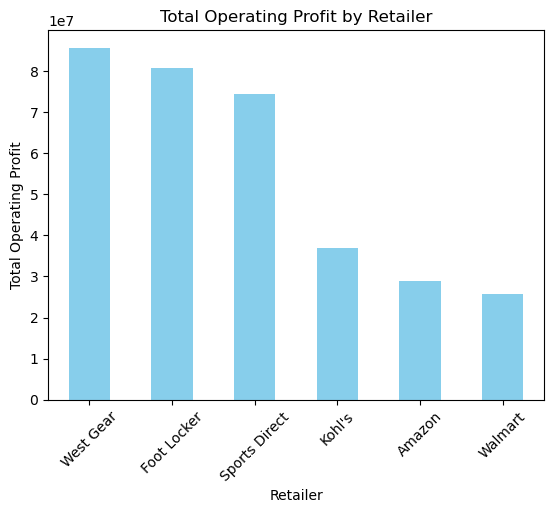

In [46]:
total_profit_per_retailer.plot(kind='bar', color='skyblue')
plt.xlabel('Retailer')
plt.ylabel('Total Operating Profit')
plt.title('Total Operating Profit by Retailer')
plt.xticks(rotation=45)
plt.show()

In [50]:
total_profit_per_retailer

Retailer
West Gear        85667873.18
Foot Locker      80722124.81
Sports Direct    74332954.96
Kohl's           36811252.58
Amazon           28818503.31
Walmart          25782052.61
Name: Operating Profit, dtype: float64

 #### West Gear stands out as a top-performing retailer, contributing a substantial total operating profit of 85,667,873.18

In [61]:
sales_by_category = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending = False)

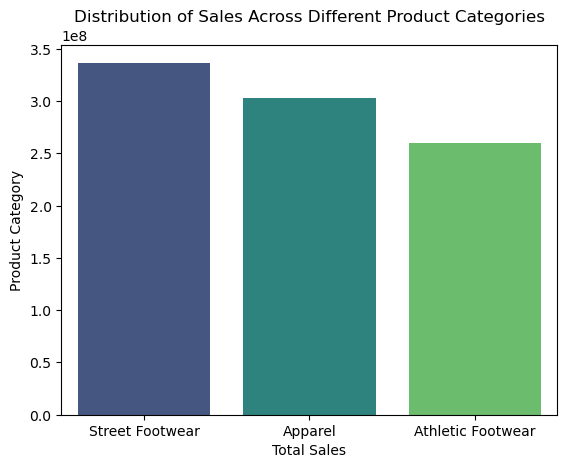

In [67]:
sns.barplot(y=sales_by_category.values, x=sales_by_category.index, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Distribution of Sales Across Different Product Categories')
plt.show()

##### In the analysis of Adidas sales, Street Footwear emerges as the top-selling product category

In [69]:
profits_by_city = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False)

In [72]:
top_5_cities = profits_by_city.head(5)

In [73]:
top_5_cities

City
Charleston       15607190.11
New York         13899973.16
Miami            12168619.11
Portland         10760799.37
San Francisco    10256249.56
Name: Operating Profit, dtype: float64

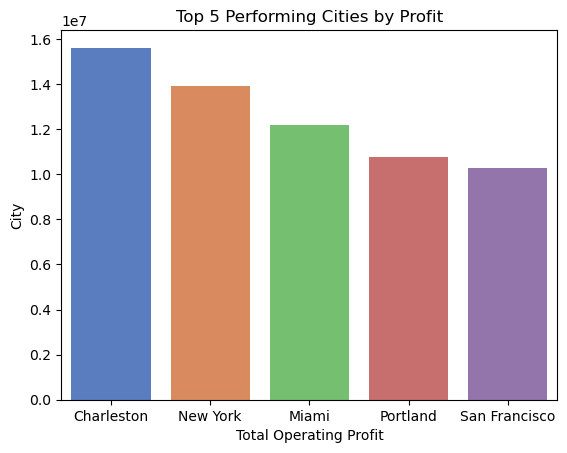

In [79]:
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='muted')
plt.xlabel('Total Operating Profit')
plt.ylabel('City')
plt.title('Top 5 Performing Cities by Profit')
plt.show()

##### Charleston stands out as the top-performing city, generating the highest total operating profit

In [92]:
product_gender = df.groupby(['Product Category','Gender Type'])['Units Sold'].sum()

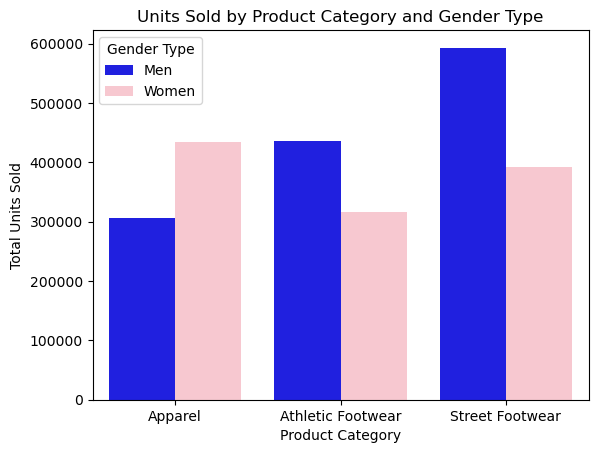

In [102]:
sns.barplot(x='Product Category', y='Units Sold', hue='Gender Type', data=product_gender.reset_index(), palette = ['blue','pink'])
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.title('Units Sold by Product Category and Gender Type')
plt.show()

##### Men bought the most Street Footwear, Women slightly led in Athletic Footwear, and both made significant purchases in Apparel.

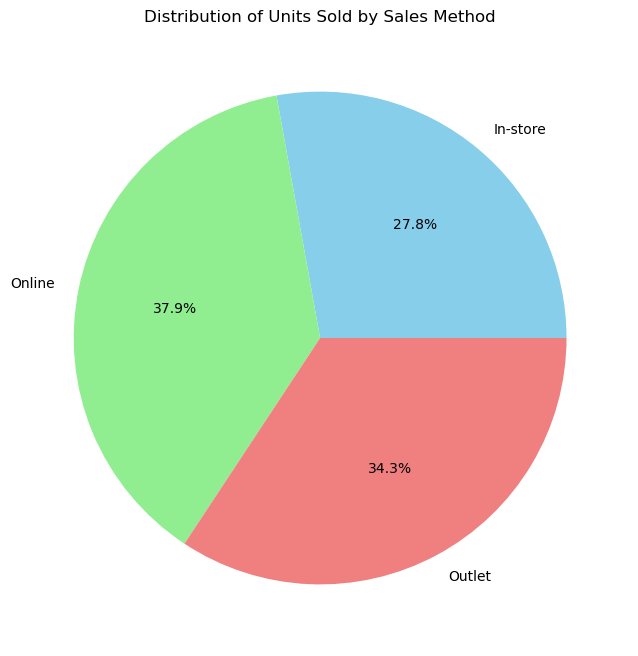

In [133]:
plt.figure(figsize=(8, 8))
sales_method_units = df.groupby('Sales Method')['Units Sold'].sum()
plt.pie(sales_method_units, labels=sales_method_units.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Units Sold by Sales Method')
plt.show()

##### The highest number of units were sold online, indicating that the 'online' sales method is the most effective in terms of unit sales

In [109]:
df['Month'] = df['Invoice Date'].dt.month_name()

In [110]:
df['Month']

0       October
1       October
2       October
3       October
4       October
         ...   
9643      March
9644      March
9645      March
9646      March
9647      March
Name: Month, Length: 9648, dtype: object

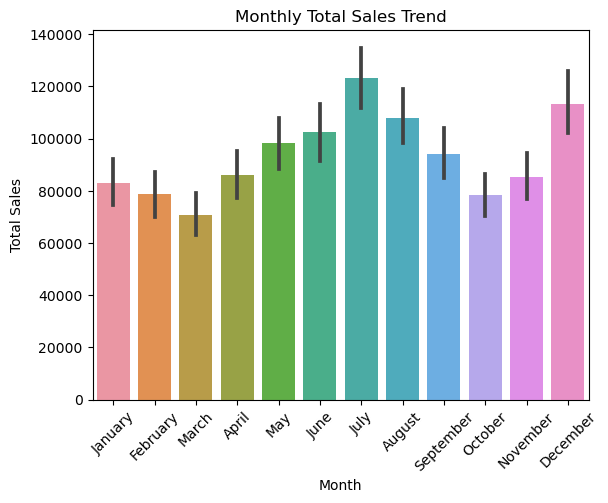

In [119]:
sns.barplot(data= df,x='Month', y='Total Sales', order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales Trend')
plt.xticks(rotation = 45)
plt.show()

##### In the analysis of total sales trends over the months, July emerged as the highest-performing month, experiencing the highest total sales. On the other hand, March recorded the lowest total sales among all the months